 # CountVectorizer

In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from util import summary_report

 ## Read the data

In [2]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df.dropna(subset=["reviewText"], inplace=True)
df.head()

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,5,0,True,2017-11-24,Amazon Customer,love wonderful story corduroy,"Love that little guy, Corduroy!",1,0.0
1,4,0,True,2017-11-07,cotton clay,kid like story really want board book one smal...,"good story, small size book though",2,0.0
2,4,0,True,2017-11-07,A Reviewer,cute book,Four Stars,2,0.0
3,5,0,True,2017-10-12,david Mansfield,son love corduroy give u different book read i...,My son loves corduroy this gave us a different...,2,0.0
4,5,0,True,2017-09-17,Jason Pollard,ive read book year always love it read child l...,Classic book,2,0.0


 ## Defining a helpful review + Splitting the data

In [3]:
split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(
    df.reviewText, df.helpful, test_size=0.25, random_state=30
)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (107302,), y_train: (107302,), x_test: (35768,), y_test: (35768,)'

 ## Vectorization with CountVectorizer

In [4]:
tm_vectorizer = CountVectorizer(stop_words="english")

term_matrix_train = tm_vectorizer.fit_transform(x_train)
term_matrix_test = tm_vectorizer.transform(x_test)

 ## Fitting

 # Random Forest

In [5]:
rfc = RandomForestClassifier(
    n_estimators=150, max_depth=150, random_state=0, n_jobs=-1, verbose=True
)
rfc.fit(term_matrix_train, y_train)
y_test_pred = rfc.predict(term_matrix_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.5s finished


Document-term Matrix(Count Vectorizer) - RandomForestClassifier
              precision    recall  f1-score   support

   Unhelpful       0.86      1.00      0.93     30747
     Helpful       0.69      0.04      0.08      5021

    accuracy                           0.86     35768
   macro avg       0.78      0.52      0.50     35768
weighted avg       0.84      0.86      0.81     35768
 
Balanced acc score:  0.51852 
Balanced acc score(luck adjusted):  0.03704
Youden Index:  0.03704


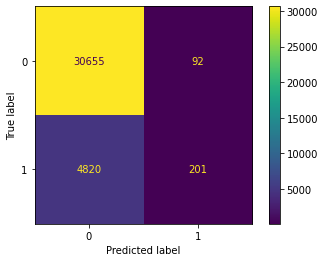

In [6]:
summary_report(
    y_test,
    y_test_pred,
    "Document-term Matrix(Count Vectorizer) - RandomForestClassifier",
)

 # LogisticRegression

In [7]:
lgr = LogisticRegression(random_state=0, max_iter=10000)
lgr.fit(term_matrix_train, y_train)
y_test_pred = lgr.predict(term_matrix_test)

Document-term Matrix(Count Vectorizer) - LogisticRegression
              precision    recall  f1-score   support

   Unhelpful       0.89      0.97      0.93     30747
     Helpful       0.56      0.26      0.35      5021

    accuracy                           0.87     35768
   macro avg       0.73      0.61      0.64     35768
weighted avg       0.84      0.87      0.85     35768
 
Balanced acc score:  0.61256 
Balanced acc score(luck adjusted):  0.22513
Youden Index:  0.22513


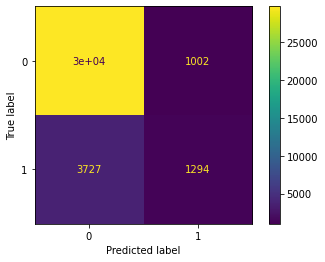

In [8]:
summary_report(
    y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - LogisticRegression"
)

 # Support-Vector Machine

In [9]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, max_iter=5000, verbose=True)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

[LibLinear]....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
optimization finished, #iter = 5000

Using -s 2 may be faster (also see FAQ)

Objective value = -24773.344290
nSV = 80501


/home/nullxdeadbeef/.cache/pypoetry/virtualenvs/amazon-sentiment-jA8IenIW-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Document-term Matrix(Count Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.89      0.95      0.92     30747
     Helpful       0.49      0.27      0.34      5021

    accuracy                           0.86     35768
   macro avg       0.69      0.61      0.63     35768
weighted avg       0.83      0.86      0.84     35768
 
Balanced acc score:  0.61013 
Balanced acc score(luck adjusted):  0.22025
Youden Index:  0.22025


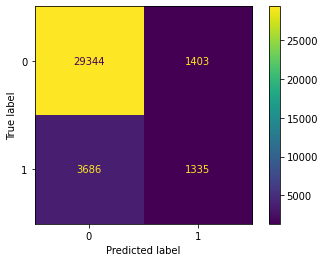

In [10]:
summary_report(y_test, y_test_pred, "Document-term Matrix(Count Vectorizer) - SVM/SVC")

 # Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(
    solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(100,), max_iter=500, random_state=1
)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)
              precision    recall  f1-score   support

   Unhelpful       0.89      0.91      0.90     30747
     Helpful       0.38      0.33      0.35      5021

    accuracy                           0.83     35768
   macro avg       0.64      0.62      0.63     35768
weighted avg       0.82      0.83      0.83     35768
 
Balanced acc score:  0.61938 
Balanced acc score(luck adjusted):  0.23875
Youden Index:  0.23875


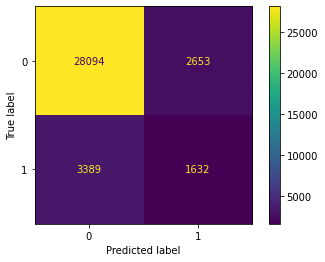

In [12]:
summary_report(
    y_test,
    y_test_pred,
    "Document-term Matrix(Count Vectorizer) - Multi-layer Perceptron (MLP)",
)

 # KMeans clustering

MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.86      0.98      0.92     30747
     Helpful       0.25      0.04      0.07      5021

    accuracy                           0.85     35768
   macro avg       0.56      0.51      0.49     35768
weighted avg       0.78      0.85      0.80     35768
 
Balanced acc score:  0.50961 
Balanced acc score(luck adjusted):  0.01923
Youden Index:  0.01923


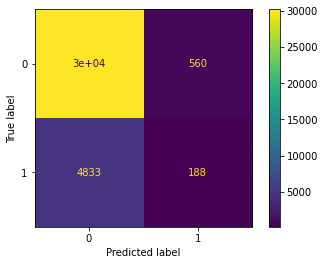

In [13]:
clf = KMeans(n_clusters=2, init="k-means++", max_iter=100, n_init=1, random_state=5)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

summary_report(y_test, y_test_pred, "MLPClassifier")

<Figure size 720x576 with 0 Axes>

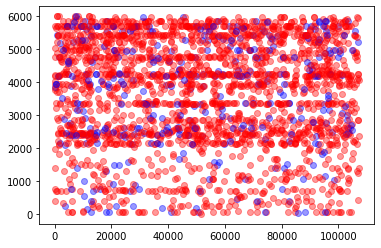

In [14]:
plt.figure(figsize=(10, 8))  # Plotting our two-features-space
mtrx_dict = term_matrix_train.todok()
xy = list(mtrx_dict.keys())

colors = ["#FF0000", "#0000FF"]

fig = plt.figure()
ax = fig.add_subplot()

LIMIT = 2500
data = random.sample(list(zip(xy, y_train)), LIMIT)
for i in range(len(data)):
    ax.scatter(x=data[i][0][0], y=data[i][0][1], color=colors[data[i][1]], alpha=0.4)
plt.show()